In [27]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

In [28]:
#%% LOAD THE MAT FILE THAT HAS THE FACES 
f = loadmat('data/faces.mat')
faces = f['faces'] #This are the faces.  There are 72 faces closely cropped to the boundary of the face.
smiling = f['smiling'][0] #Flag to indicate if the face was a smile. 0 means neutral expression and 1 means smiling.
#%% PCA 


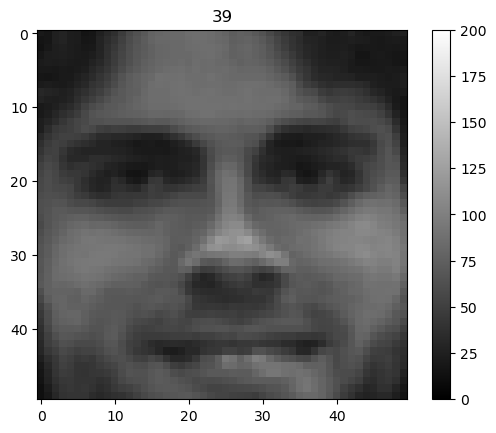

In [29]:
imageno  = 39
f1 = faces[imageno,:,:]
plt.figure()
plt.imshow(f1,cmap='gray',vmin = 0,vmax = 200)
plt.title(imageno)
plt.colorbar()
#plt.axis('off')

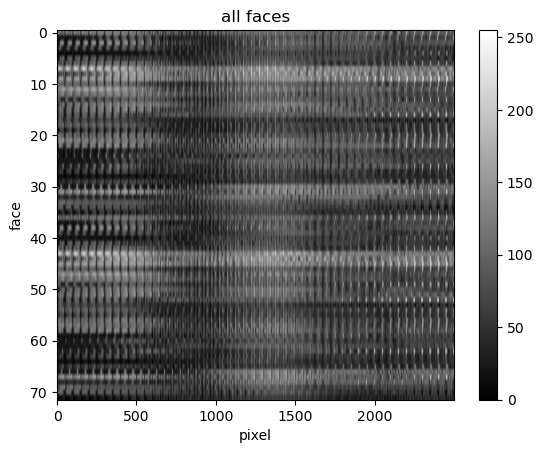

In [30]:
faces_data = faces.reshape(72,50*50)
plt.figure()
plt.imshow(faces_data,cmap='gray',vmin = 0,vmax = 255,aspect = "auto")
plt.title("all faces")
plt.xlabel("pixel")
plt.ylabel("face")
plt.colorbar()

(-0.5, 49.5, 49.5, -0.5)

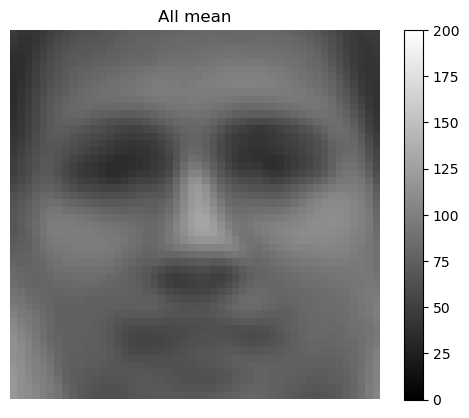

In [31]:
allmean = np.mean(faces,axis = 0)
plt.figure()
plt.imshow(allmean,cmap='gray',vmin = 0,vmax = 200)
plt.title("All mean")
plt.colorbar()
plt.axis("off")

In [32]:
pca = PCA(n_components = 71) #decide of number of components. ALWAYS smaller than the number of observations
                             #if you dont specify it, it will give you min(nsamples,nfeatures)-1
pca.fit(faces_data) #fit the model
eigenvector = pca.components_ #get the eigenvectors - components
latent = pca.explained_variance_ #get the eigenvalues - explained variance
score = pca.transform(faces_data) # get the score, "coordinate" of each face in the new pc 
#%%

### All latent variable analysis begin by examining how much variance is expressed by each latent variable.  

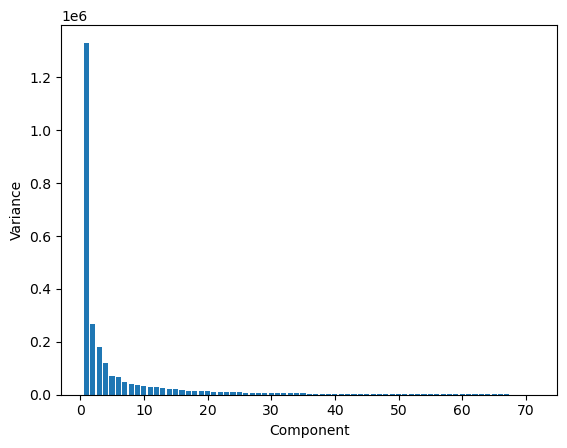

In [33]:
#ALWAYS PLOT LATENT FIRST
plt.figure()
plt.bar(range(1,72),latent)
plt.xlabel('Component')
plt.ylabel("Variance")
plt.show()



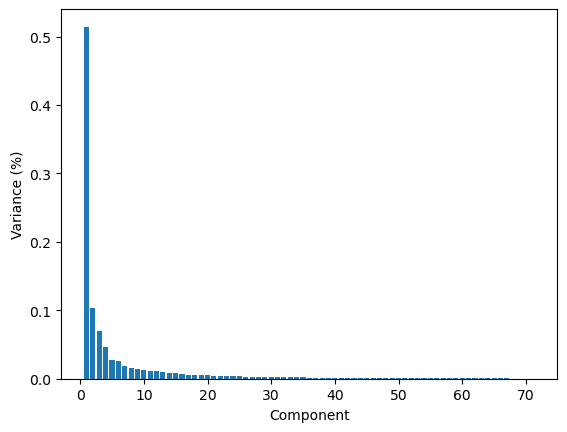

In [34]:
#Its more useful to express variance as a fraction of total. 
prct_latent = pca.explained_variance_ratio_
plt.figure()
plt.bar(range(1,72),prct_latent)
plt.xlabel('Component')
plt.ylabel("Variance (%)")
plt.show()

### This is pretty interesting. The first principal component accounts for more than half the variance in the data.  It quickly falls off, and by the 20th component, hardly any variability is left. 

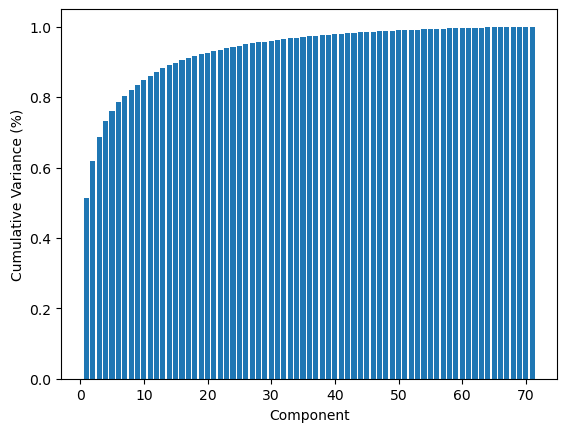

In [35]:
cum_latent = np.cumsum(prct_latent)
plt.figure()
plt.bar(range(1,72),cum_latent)
plt.xlabel('Component')
plt.ylabel("Cumulative Variance (%)")
plt.show()

### Like all good data analysis methods, PCA removes the mean of the data. You can get it back from the PCA object and it should look familiar to you. 

### When you apply it to data where all the data are in the same units, its fine to do it the way I did it. If you are using data in different units, always use `StandardScaler` to put all the data in standardized units. 

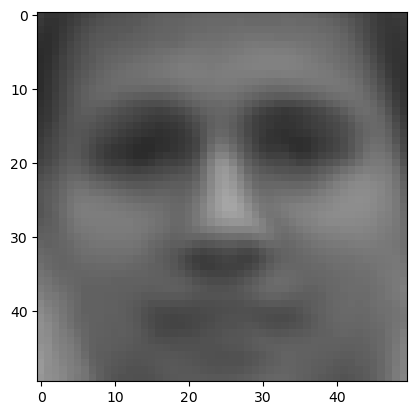

In [51]:
meanface = pca.mean_
mf = meanface.reshape(50,50)
plt.imshow(mf,cmap="gray",vmin = 0, vmax = 200)
plt.show()

### Interpreting the Eigenvectors -> as Faces! 

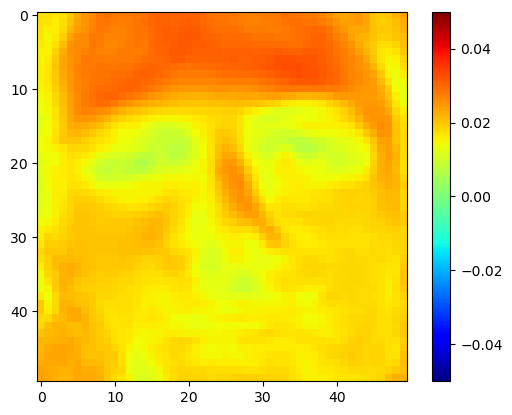

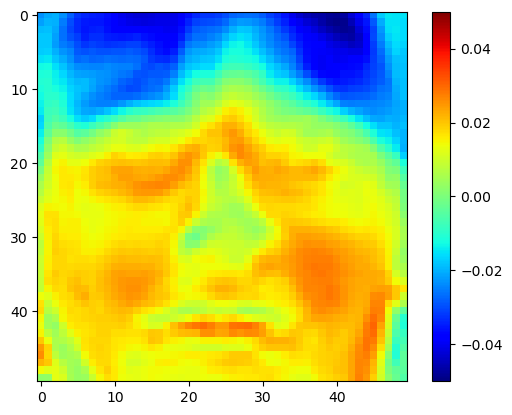

In [43]:
eigenfaces = eigenvector.reshape(71,50,50)
for j in range(2):
    plt.figure()
    plt.imshow(eigenfaces[j,:,:],cmap = 'jet',vmin = -0.05, vmax = 0.05)
    plt.colorbar()
    plt.show()


### Interpreting the Scores -> The coordinate of each face ("Loading") in the coordinate system defined by the eigenvectors

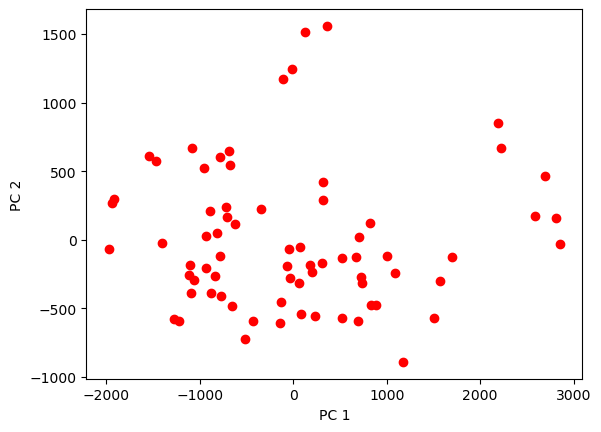

In [44]:
plt.figure()
plt.plot(score[:,0],score[:,1],'ro')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### Any face can be approximated using the eigenfaces and the weights given by the score. 

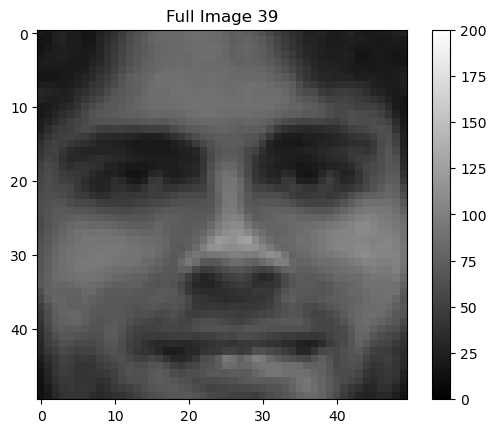

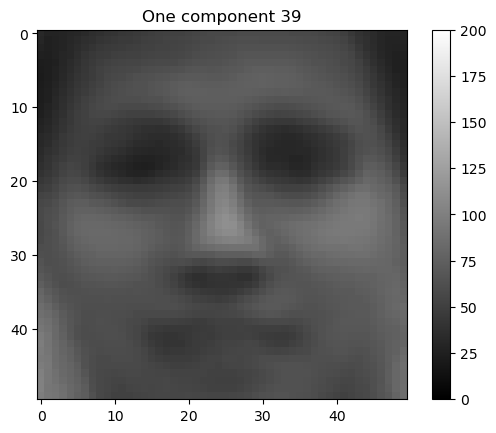

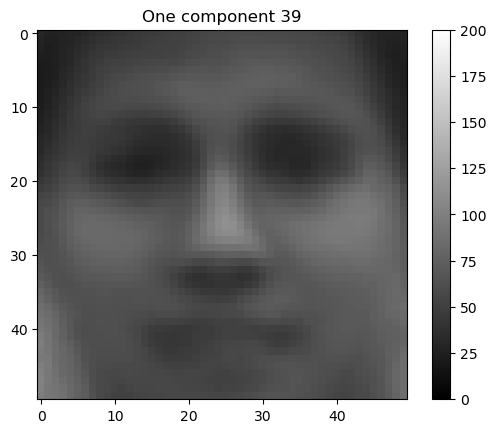

In [52]:
imageno  = 39
f1 = faces[imageno,:,:]
plt.figure()
plt.imshow(f1,cmap='gray',vmin = 0,vmax = 200)
plt.title("Full Image " + str(imageno))
plt.colorbar()
proj1 = score[imageno,0]*eigenvector[0,:]
makeface1 = proj1.reshape(50,50)+meanface.reshape(50,50)
plt.figure()
plt.imshow(makeface1,cmap='gray',vmin = 0,vmax = 200)
plt.title("One component " + str(imageno))
plt.colorbar()
makeface2 = score[imageno,0]*eigenvector[0,:]+score[imageno,1]*eigenvector[1,:]
makeface2 = makeface2.reshape(50,50)+meanface.reshape(50,50)

plt.figure()
plt.imshow(makeface2,cmap='gray',vmin = 0,vmax = 200)
plt.title("Two components " + str(imageno))
plt.colorbar()

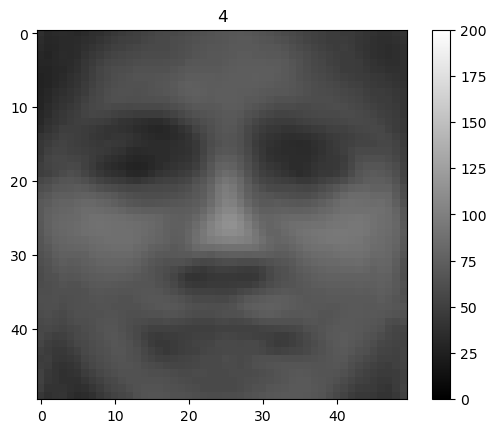

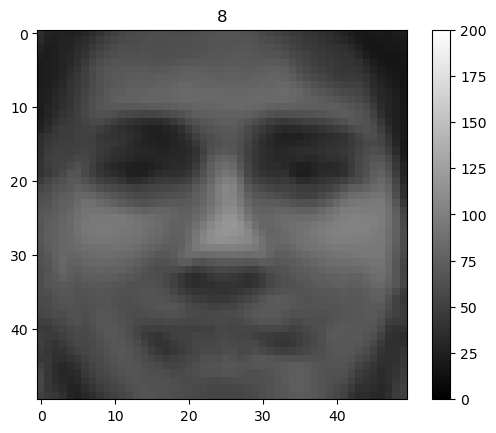

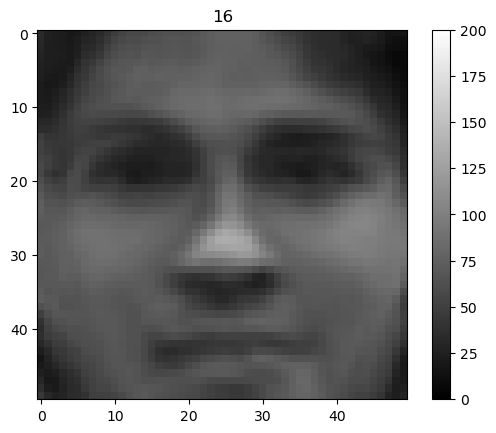

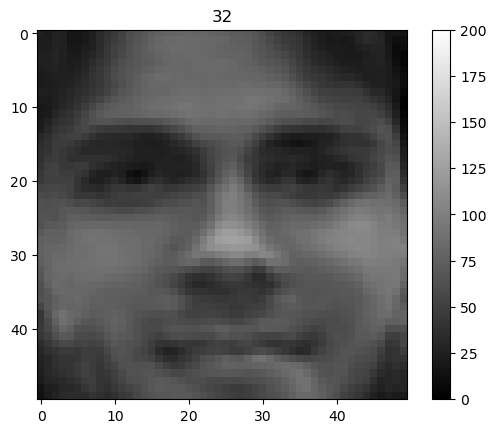

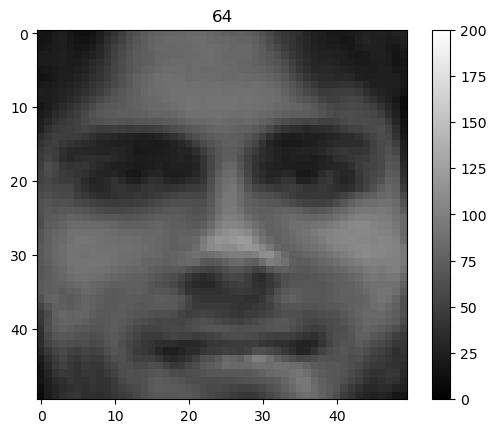

In [55]:
ncomp = [4,8,16,32,64]
for j in ncomp:
    compface = score[imageno,np.arange(j)]@eigenvector[np.arange(j),:]+meanface
    makeface = compface.reshape(50,50)
    plt.figure()
    plt.imshow(makeface,cmap='gray',vmin = 0,vmax = 200)
    plt.title(j)
    plt.colorbar()
